# PublishingEmployees

In [1]:
#Importing Common Data Handling & Processing Libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Data:
df=pd.read_csv("PublishingEmployees.csv")
df.head()

,Date,Employees
0,1/1/1990,69.1
1,2/1/1990,69.2
2,3/1/1990,69.9
3,4/1/1990,69.7
4,5/1/1990,69.8


In [3]:
#there is no null valuse present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [4]:
# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [6]:
#data is month wise
df.index.freq='MS'

In [7]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Date', length=348, freq='MS')

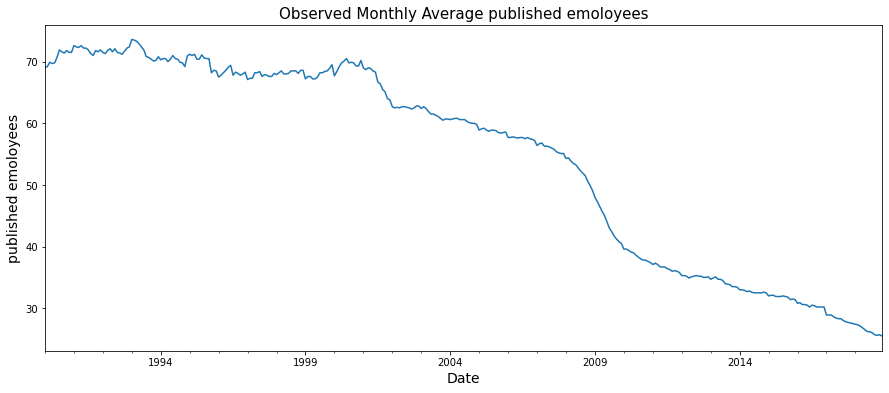

In [8]:
df.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('published emoloyees', fontsize = 14)
plt.title('Observed Monthly Average published emoloyees', fontsize = 15)
plt.show()

In [9]:
### Visualising Moving Averages of the Surface Temperatures:

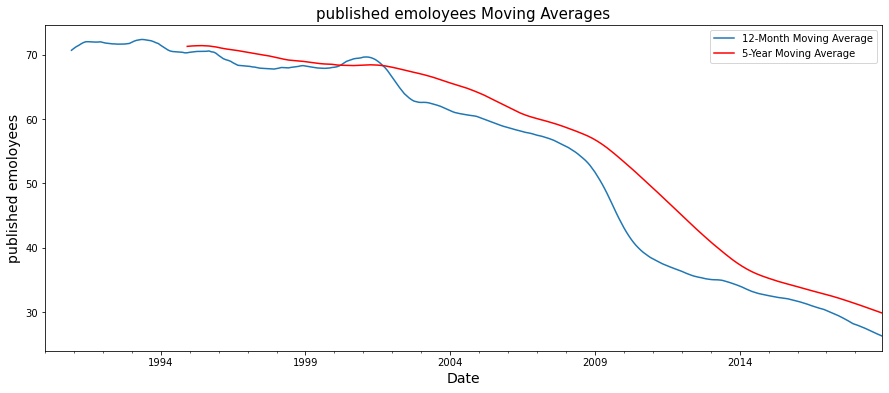

In [10]:
yearly = df['Employees'].rolling(window = 12).mean()
fiveyearly = df['Employees'].rolling(window = 60).mean()
MAax = yearly['1990':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['1990':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('published emoloyees', fontsize = 14)
plt.title('published emoloyees Moving Averages', fontsize = 15)
plt.legend()
plt.show()

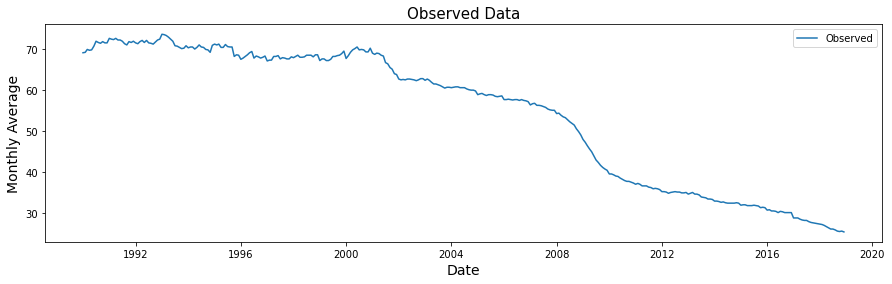

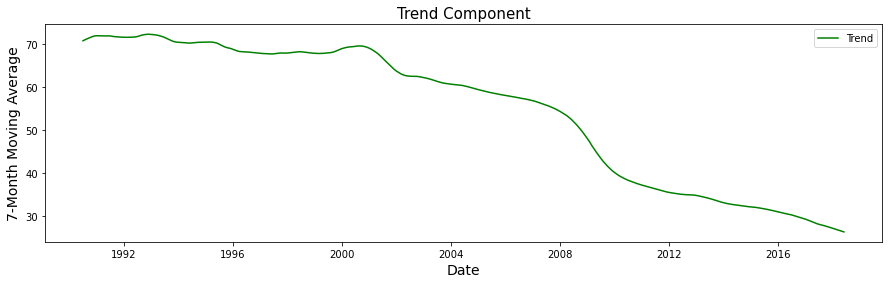

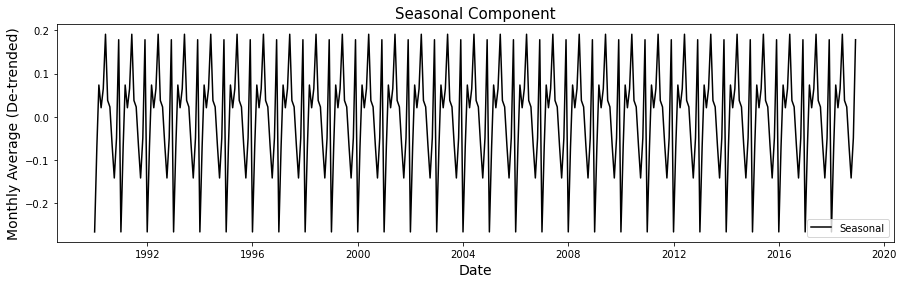

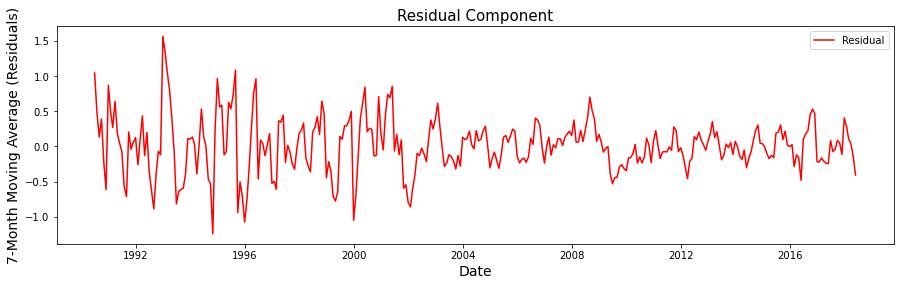

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(df)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (15, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (15, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (15, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'black')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (15, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(result[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    
    print (result)
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
    
    
adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                   0.439736
p-value                          0.982922
No. of Lags Used                14.000000
Number of Observations Used    333.000000
dtype: float64
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
df ['Employees']=df['Employees'].diff()

In [14]:
df.dropna(inplace=True)

In [15]:
df

,Employees
Date,
1990-02-01,0.1
1990-03-01,0.7
1990-04-01,-0.2
1990-05-01,0.1
1990-06-01,0.9
...,...
2018-08-01,-0.2
2018-09-01,-0.3
2018-10-01,-0.1


In [16]:
adf_test(df)

Results of Dickey-Fuller Test:
Test Statistic                  -3.675454
p-value                          0.004472
No. of Lags Used                11.000000
Number of Observations Used    335.000000
dtype: float64
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
train_data = df.loc['1990-01-01':'2017-12-01']
test_data = df.loc['2018-01-01':]

In [33]:
train_data

,Employees
Date,
1990-02-01,0.1
1990-03-01,0.7
1990-04-01,-0.2
1990-05-01,0.1
1990-06-01,0.9
...,...
2017-08-01,-0.3
2017-09-01,-0.2
2017-10-01,-0.1


In [32]:
test_data

,Employees
Date,
2018-01-01,-0.1
2018-02-01,-0.1
2018-03-01,-0.2
2018-04-01,-0.3
2018-05-01,-0.3
2018-06-01,-0.3
2018-07-01,0.0
2018-08-01,-0.2
2018-09-01,-0.3


# Autoregressive Integrated Moving Average

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders

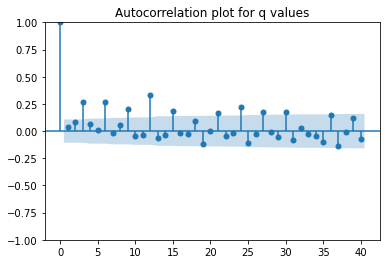

In [36]:
title = 'Autocorrelation plot for q values'
lags = 40
plot_acf(train_data,title=title,lags=lags);

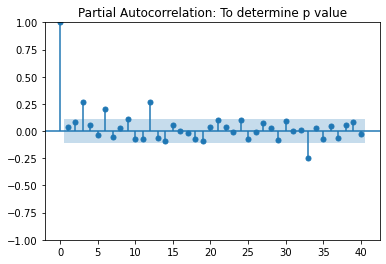

In [37]:
# Assuming you have the 'train_data' variable containing your time series data

title = 'Partial Autocorrelation: To determine p value'
lags = 40
method = 'yw'  # Specify the method for calculating partial autocorrelations

plot_pacf(train_data, title=title, lags=lags, method=method)
plt.show()


In [38]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train_data,order=(0,0,2))

In [39]:
results =arima.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Employees   No. Observations:                  335
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -207.714
Date:                Mon, 10 Jul 2023   AIC                            423.428
Time:                        21:27:33   BIC                            438.684
Sample:                    02-01-1990   HQIC                           429.510
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1239      0.027     -4.546      0.000      -0.177      -0.070
ma.L1         -0.0088      0.049     -0.179      0.858      -0.105       0.088
ma.L2          0.0820      0.052      1.579      0.114      -0.020       0.184
sigma2         0.2023      0.010     20.582      0.000       0.183       0.222
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               168.87
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

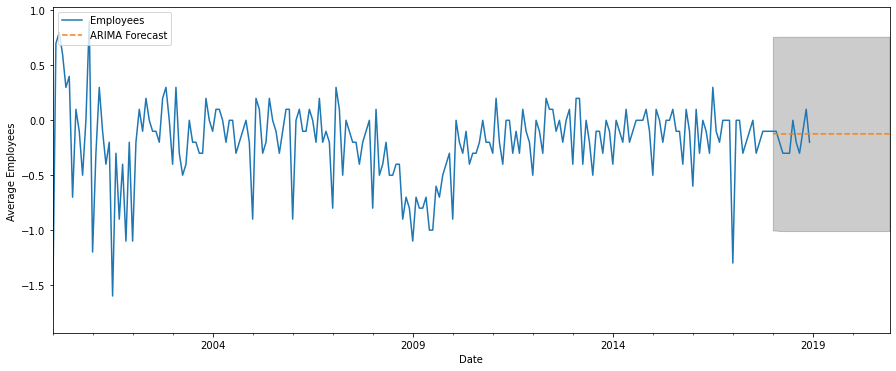

In [40]:
#Getting the ARIMA forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = results.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = df['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Employees ')
plt.legend(loc = 'upper left')
plt.show()

# Seasonal Autoregressive Integrated Moving Average 

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
sarima=SARIMAX(train_data, order = (1, 1, 2), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)

In [43]:
results1 =sarima.fit(maxiter = 200) 
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  335
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -169.638
Date:                              Mon, 10 Jul 2023   AIC                            351.276
Time:                                      21:27:41   BIC                            373.867
Sample:                                  02-01-1990   HQIC                           360.298
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8752      0.078    -11.184      0.000      -1.029      -0.722
ma.L1         -0.0138      0.090     -0.153      0.878      -0.190       0.162
ma.L2         -0.7792      0.074    -10.492      0.000      -0.925      -0.634
ar.S.L12       0.6212      0.077      8.026      0.000       0.469       0.773
ma.S.L12      -0.3384      0.093     -3.646      0.000      -0.520      -0.157
sigma2         0.1680      0.008     21.062      0.000       0.152       0.184
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               296.55
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

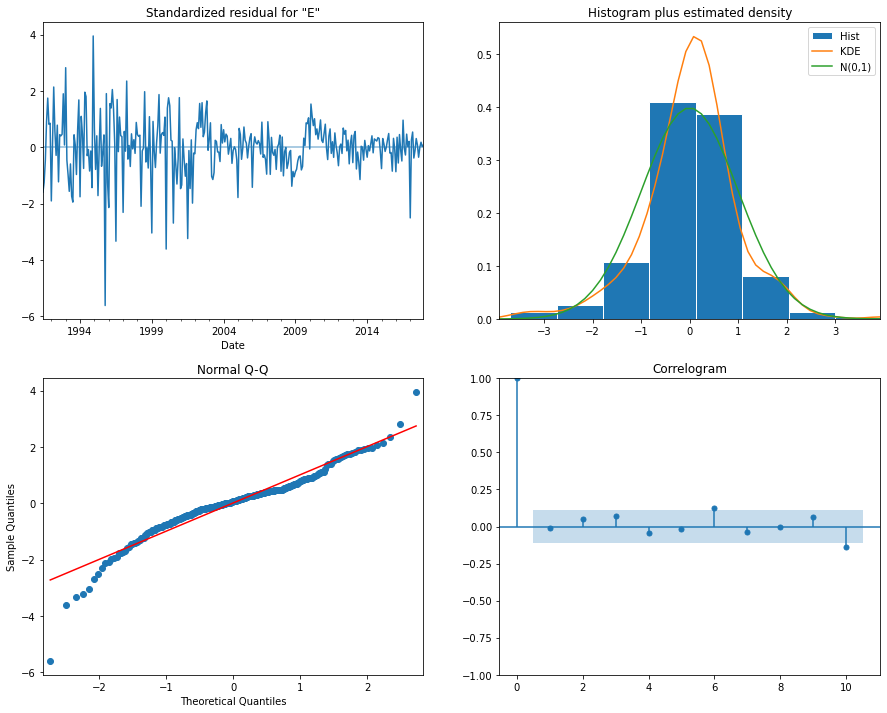

In [44]:
results1.plot_diagnostics(figsize = (15, 12))
plt.show()

# SARIMAX Forecasting:

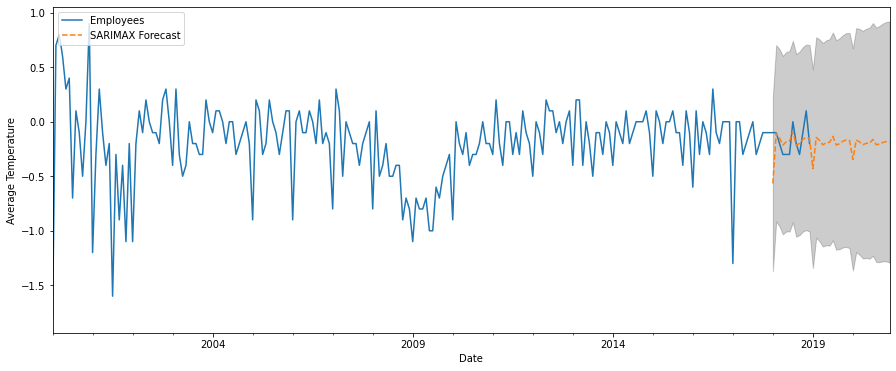

In [45]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred=results1.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = df['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

In [49]:
import numpy as np

# Assuming you have the 'y_forecasted_SARIMAX' and 'y_truth' variables

# Handle missing values with mean imputation
y_forecasted_SARIMAX = np.nan_to_num(y_forecasted_SARIMAX, nan=np.nanmean(y_forecasted_SARIMAX))
y_truth = np.nan_to_num(y_truth, nan=np.nanmean(y_truth))

# Calculate the MSE and RMSE
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
rmse_SARIMAX = np.sqrt(mse_SARIMAX)

print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(rmse_SARIMAX, 2)))


The Mean Squared Error of SARIMAX forecast is 0.02
The Root Mean Squared Error of SARIMAX forecast is 0.15


# Additional Data Pre-processing:
Scaling the Data:

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train_data).reshape(-1, 1))

In [65]:
pip install --upgrade protobuf

Note: you may need to restart the kernel to use updated packages.


In [68]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

window_size = 60

train_generator = TimeseriesGenerator(train_scaled, 
                                      train_scaled,
                                      length=window_size, 
                                      batch_size=1)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates